In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [86]:
train=pd.read_csv('C:\\Users\\User\\Downloads\\SalaryData_Train.csv')

In [87]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [88]:
test=pd.read_csv('C:\\Users\\User\\Downloads\\SalaryData_Test.csv')

In [89]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [90]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
age              15060 non-null int64
workclass        15060 non-null object
education        15060 non-null object
educationno      15060 non-null int64
maritalstatus    15060 non-null object
occupation       15060 non-null object
relationship     15060 non-null object
race             15060 non-null object
sex              15060 non-null object
capitalgain      15060 non-null int64
capitalloss      15060 non-null int64
hoursperweek     15060 non-null int64
native           15060 non-null object
Salary           15060 non-null object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [91]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
age              30161 non-null int64
workclass        30161 non-null object
education        30161 non-null object
educationno      30161 non-null int64
maritalstatus    30161 non-null object
occupation       30161 non-null object
relationship     30161 non-null object
race             30161 non-null object
sex              30161 non-null object
capitalgain      30161 non-null int64
capitalloss      30161 non-null int64
hoursperweek     30161 non-null int64
native           30161 non-null object
Salary           30161 non-null object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [92]:
train['Salary']=train['Salary'].replace((' <=50K',' >50K'),(0,1))
test['Salary']=test['Salary'].replace((' <=50K',' >50K'),(0,1))

In [93]:
train.corr()['Salary']

age             0.241991
educationno     0.335287
capitalgain     0.221195
capitalloss     0.150222
hoursperweek    0.229480
Salary          1.000000
Name: Salary, dtype: float64

In [94]:
train.select_dtypes(include=[np.number]).columns

Index(['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek',
       'Salary'],
      dtype='object')

In [95]:
test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [96]:
train['hoursperweek'].unique()

array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 43, 38, 55,
       48, 58, 32, 70, 22, 56, 41, 28, 36, 24, 46,  2, 42, 12, 65,  1, 34,
       75, 98, 33, 54, 10,  6, 64, 19, 18, 72,  8,  9, 47, 37, 21, 26, 14,
        5,  7, 99, 53, 39, 62, 59, 57, 78, 90, 66, 11, 49, 84, 17, 68,  3,
       27, 85, 31, 51, 77, 63, 23,  4, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95], dtype=int64)

In [97]:
train['capitalloss'].unique()

array([   0, 2042, 1408, 1902, 1887, 1719, 1762, 1564, 2179, 1816, 1980,
       1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721, 2051,
       2377, 1669, 2352, 1672,  653, 2392, 1504, 1590, 1651, 1628, 1848,
       2001, 1740, 2002, 1579, 2258, 1602, 2547, 2205, 1726, 2444, 1138,
       2238,  625,  213, 1539,  880, 1668, 1092, 1594, 2231, 1844,  810,
       2824, 2559, 2057, 1573, 1974,  974, 2174, 2149, 1735, 1258, 2603,
       2282,  323, 2246, 1617, 1648, 1825, 3770, 1755, 3683, 2129, 4356,
       2267, 2080, 2457,  419,  155, 3900, 2201, 1944, 2467, 2754, 2472,
       3004, 1411], dtype=int64)

In [98]:
train['Salary'].value_counts()

0    22653
1     7508
Name: Salary, dtype: int64

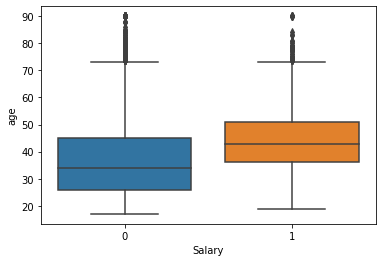

In [99]:
sns.boxplot(x='Salary', y='age',data=train)

In [100]:
train.select_dtypes(exclude=[np.number]).columns

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native'],
      dtype='object')

In [101]:
test.select_dtypes(exclude=[np.number]).columns

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native'],
      dtype='object')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

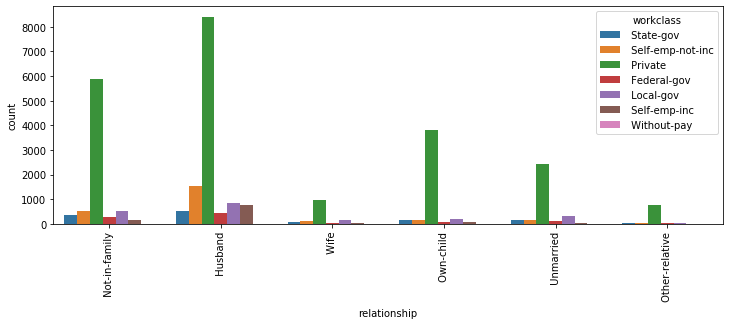

In [93]:
plt.figure(figsize=(12,4))
sns.countplot(x='relationship',data=train,hue='workclass')
plt.xticks(rotation=90)

In [75]:
train['workclass'].value_counts()

0.738868    22285
0.082855     2499
0.068532     2067
0.042406     1279
0.035609     1074
0.031266      943
0.000464       14
Name: workclass, dtype: int64

In [35]:
#from sklearn.preprocessing import LabelEncoder

#lb_make = LabelEncoder()
#train["education_l"] = lb_make.fit_transform(train["education"])

In [102]:
fe=train.groupby('workclass').size()/len(train)
train['workclass']=train['workclass'].map(fe)
fe1=test.groupby('workclass').size()/len(test)
test['workclass']=test['workclass'].map(fe1)

In [114]:
test.select_dtypes(exclude=[np.number]).columns

Index(['race', 'native'], dtype='object')

In [77]:
#train[["education_a",'education']].head(10)

In [104]:
edu_dict={' HS-grad' :1,
' Some-college' :2,
' Bachelors' :3,
' Masters' :4,
' Assoc-voc' :5,
' 11th' :6,
' Assoc-acdm' :7,
' 10th' :8,
' 7th-8th' :9,
' Prof-school' :10,
' 9th' :11,
' 12th' :12,
' Doctorate' :13,
' 5th-6th' :14,
' 1st-4th' :15,
' Preschool' :16  
}
train['education']=train.education.map(edu_dict)
test['education']=test.education.map(edu_dict)

In [121]:
train.select_dtypes(exclude=[np.number]).columns

Index([], dtype='object')

In [57]:
#train['education'].value_counts()/len(train)

In [66]:
train['maritalstatus'].value_counts()

 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64

In [106]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
train["maritalstatus"] = lb_make.fit_transform(train["maritalstatus"])


test["maritalstatus"] = lb_make.fit_transform(test["maritalstatus"])

In [ ]:
#train['maritalstatus']=train['maritalstatus'].replace(['NONE', 'ANY'], 'OTHER')

In [59]:
train['occupation'].value_counts()

9     4038
2     4030
3     3992
0     3721
11    3584
7     3212
6     1965
13    1572
5     1350
4      989
12     912
10     644
8      143
1        9
Name: occupation, dtype: int64

In [108]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
train["occupation"] = lb_make.fit_transform(train["occupation"])
test["occupation"] = lb_make.fit_transform(test["occupation"])

In [69]:
train['relationship'].value_counts()

 Husband           12463
 Not-in-family      7726
 Own-child          4466
 Unmarried          3212
 Wife               1406
 Other-relative      888
Name: relationship, dtype: int64

In [110]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
train["relationship"] = lb_make.fit_transform(train["relationship"])
test["relationship"] = lb_make.fit_transform(test["relationship"])

In [116]:
train['race'].value_counts()

 White                 25932
 Black                  2817
 Asian-Pac-Islander      895
 Amer-Indian-Eskimo      286
 Other                   231
Name: race, dtype: int64

In [117]:
train['native'].value_counts()

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 El-Salvador                     100
 India                           100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Taiwan                           42
 Iran                             42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

In [118]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
train["native"] = lb_make.fit_transform(train["native"])
test["native"] = lb_make.fit_transform(test["native"])


In [119]:
train["race"] = lb_make.fit_transform(train["race"])
test["race"] = lb_make.fit_transform(test["race"])

In [112]:
train['sex']=train['sex'].replace((' Male',' Female'),(0,1))

In [113]:
test['sex']=test['sex'].replace((' Male',' Female'),(0,1))

In [84]:
#train['native'].value_counts()

In [91]:
train['sex'].value_counts()

0    20380
1     9781
Name: sex, dtype: int64

In [96]:
#dumy=pd.get_dummies(train[['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
#       'race', 'native']],drop_first=True)
#train=train.drop(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
 #      'race', 'native'],axis=1)
#train=pd.concat([train,dumy],axis=1)

In [102]:
#dumy=pd.get_dummies(test[['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
#       'race', 'native']],drop_first=True)
#test=test.drop(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
#       'race', 'native'],axis=1)
#test=pd.concat([test,dumy],axis=1)

In [122]:
X_train=train.drop('Salary',axis=1).values
y_train=train['Salary'].values
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)
from sklearn.preprocessing import MinMaxScaler,StandardScaler
Scaler=MinMaxScaler()
X_train=Scaler.fit_transform(X_train)
X_test=Scaler.transform(X_test)

svc=SVC(kernel='rbf')#rbf=0.87#linear=0.83
svc.fit(X_train,y_train)
pred_svc=svc.predict(X_test)
print(classification_report(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))

In [123]:
X_test=test.drop('Salary',axis=1).values
y_test=test['Salary'].values

In [124]:
#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [125]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [126]:
Scaler=MinMaxScaler()

In [127]:
X_train=Scaler.fit_transform(X_train)
X_test=Scaler.transform(X_test)

In [128]:
print(round(float(1/30161)),)

0


In [129]:
len(train)

30161

In [130]:
from sklearn.svm import SVC

In [132]:
svc=SVC(kernel='rbf')#rbf=0.87#linear=0.83
svc.fit(X_train,y_train)
pred_svc=svc.predict(X_test)
print(classification_report(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))

F:\ANACONDARAJ\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.84      0.95      0.89     11360
           1       0.75      0.45      0.56      3700

    accuracy                           0.83     15060
   macro avg       0.79      0.70      0.73     15060
weighted avg       0.82      0.83      0.81     15060

[[10799   561]
 [ 2044  1656]]


In [112]:
#from sklearn.model_selection import GridSearchCV
#parameters=[{'C':[1,10,10,100],'kernel':['linear']},
 #         {'C':[1,10,10,100],'kernel':['rbf'],'gamma':[0.0003,0.0004,0.00001,0.0005]}]
#grid_search=GridSearchCV(estimator=svc,param_grid=parameters,n_jobs=-1,cv=10,scoring='accuracy')
#grid_search.fit(X_train,y_train)

In [ ]:
#parameters=[{'C':[1,10,10,100],'kernel':['linear']},
 #         {'C':[1,10,10,100],'kernel':['rbf'],'gamma':[0.0003,0.0004,0.00001,0.0005]}]
#grid_search=GridSearchCV(estimator=svc,param_grid=parameters,n_jobs=-1,cv=10,scoring='accuracy')
#grid_search.fit(X_train,y_train)